In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sps
from tqdm.notebook import tqdm as tqdm_notebook
from statsmodels.stats.proportion import proportion_confint
from scipy.stats import norm

In [2]:
def ttest(sample_a, sample_b, z_sig):
    
    mean_sample_a = np.mean(sample_a)
    mean_sample_b = np.mean(sample_b)
    diff_mean = mean_sample_b - mean_sample_a
    
    std_error_a = np.var(sample_a)/len(sample_a)
    std_error_b = np.var(sample_b)/len(sample_b)
    diff_mean_std_error = std_error_a + std_error_b
    t_stat = diff_mean/np.sqrt(diff_mean_std_error)
    
    if t_stat >= z_sig:
        res = 1
    else:
        res = 0
    
    p_val = 1-sps.norm.cdf(t_stat)
    
    return res, p_val

In [3]:
mean_a = 1000 
mean_b = 1003
var_a = 90000
var_b = 90000
mde = mean_b-mean_a 
sig = 0.025
z_sig = sps.norm.ppf(1-sig)
step_size = 1000

res_dict_p_vals = {}
marginal_power = []

for i in tqdm_notebook(range(1,1001)):

    power_list = []
    sample_size_list = []
    results = []
    p_vals = []

    sample_a = []
    sample_b = []

    for step_num in range(1,300):

    #     n = sps.poisson.rvs(step_size, size=1)
        n = step_size

        sample_a = sample_a + list(sps.norm(loc=mean_a, scale=np.sqrt(var_a)).rvs(n))
        sample_b = sample_b + list(sps.norm(loc=mean_b, scale=np.sqrt(var_b)).rvs(n))
        res, p_val = ttest(sample_a, sample_b, z_sig)

        sample_size_current = len(sample_a)
        sample_size_list.append(sample_size_current)
        results.append(res)  
        p_vals.append(p_val)

        z_power = z_sig-np.sqrt(sample_size_current)*mde/np.sqrt(var_a+var_b)
        power = 1-sps.norm.cdf(z_power)
        power_list.append(power)

    if sum(results) == len(results):
        marginal_power.append(power_list[0])
    elif sum(results) == 0 or results[-1] == 0:
        marginal_power.append(0)
    else:
        marginal_power.append(power_list[len(results)-results[::-1].index(0)])
        
    res_dict_p_vals[i] = p_vals
    
pd.DataFrame({'marginal_power': marginal_power, 
              'p_values': list(res_dict_p_vals.values())}).to_csv('pval_vs_power.csv', index=False)


  0%|          | 0/1000 [00:00<?, ?it/s]

In [16]:
pd.DataFrame({'marginal_power': marginal_power, 'p_values': list(res_dict_p_vals.values())}).to_csv('pval_vs_power.csv', 
                                                                                                    index=False)


In [ ]:
df = pd.read_csv('pval_vs_power.csv')

In [3]:
df = pd.read_csv('pval_vs_power.csv')

<AxesSubplot:xlabel='marginal_power', ylabel='Count'>

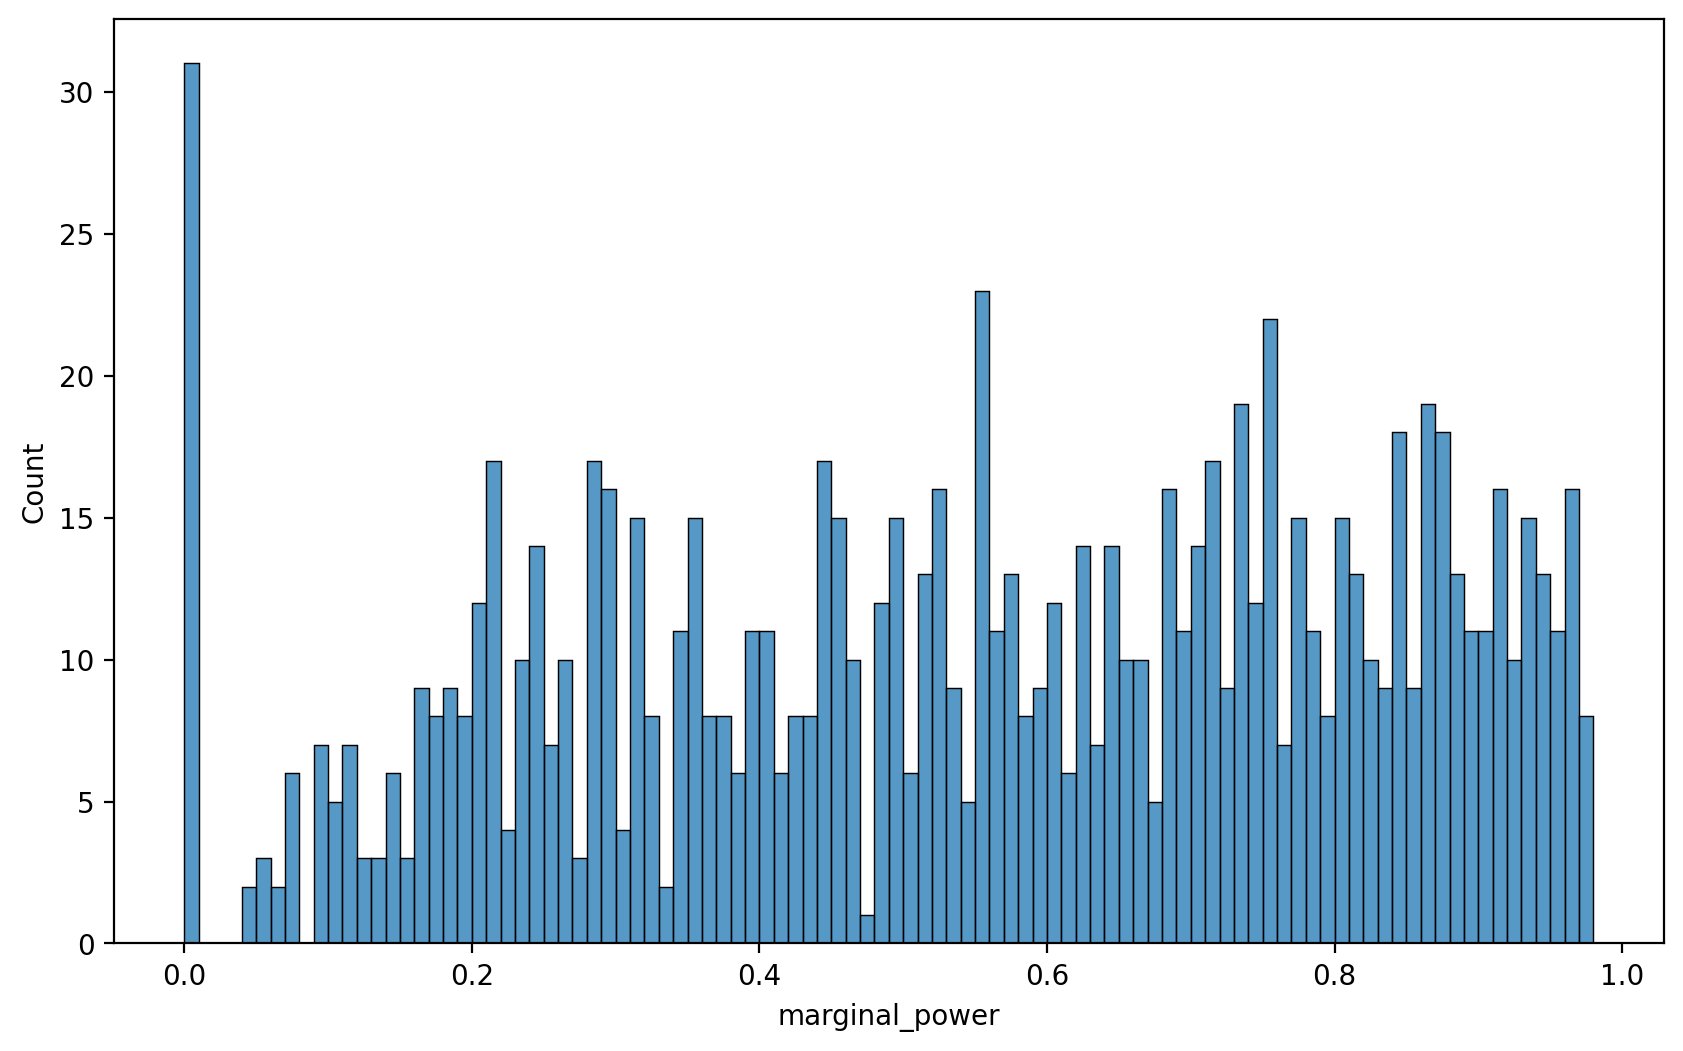

In [15]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=200)
sns.histplot(df.marginal_power, binwidth=0.01)

<AxesSubplot:xlabel='marginal_power', ylabel='Proportion'>

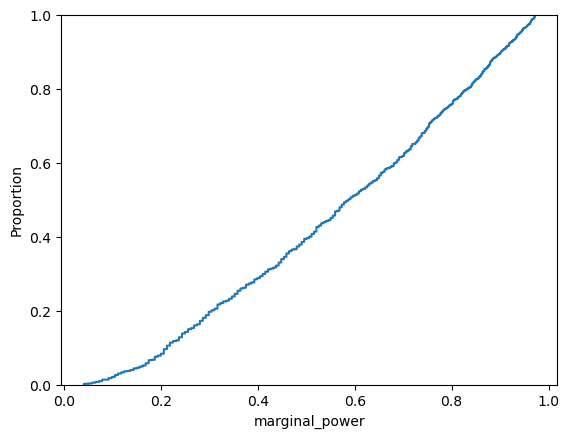

In [10]:
stat = "proportion"  # or proportion
sns.ecdfplot(df[df['marginal_power']>0]['marginal_power'], stat=stat)